#Python6. Прогнозування часових послідовностей.

# Опис задачі


1.   Побудувати та проаналізувати часовий ряд для статистики якогось із захворювань (наприклад Covid) в двох сусідніх країнах по вашому вибору (дані взяти в інтернеті).

2.   Побудувати та проаналізувати часовий ряд для курсу гривня/долар або гривня/євро за останні 3 роки (дані взяти в інтернеті).
3. Додаткове завдання.

# Опис вирішення задачі

Імпортую необхідні бібліотеки

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Бібліотека для роботи з часовими рядами
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## <h2>Завдання 1</h2>

Побудувати та проаналізувати часовий ряд для статистики якогось із захворювань (наприклад Covid) в двох сусідніх країнах по вашому вибору (дані взяти в інтернеті).

Завантажую дані про COVID-19 з файлу, який знаходиться на Google drive у датафрейм.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
filename = "/content/drive/My Drive/modified_covid_file.csv"
covid_df = pd.read_csv(filename, index_col=['date'], parse_dates=['date'])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
covid_df

,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,World,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,100.0,NaN,NaN,NaN
2020-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,287.0,NaN,NaN,NaN
2020-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,493.0,NaN,NaN,NaN
2020-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,683.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-01,220.0,5203.0,139.0,74.0,166.0,5.0,0.0,10.0,3520.0,324.0,...,96.0,0.0,0.0,0.0,114144.0,0.0,1536867.0,0.0,220.0,491.0
2022-03-02,194.0,6736.0,123.0,69.0,84.0,0.0,0.0,2.0,8141.0,342.0,...,95.0,0.0,0.0,458.0,151852.0,0.0,1651452.0,0.0,233.0,632.0
2022-03-03,141.0,10098.0,0.0,51.0,93.0,0.0,0.0,0.0,9219.0,259.0,...,91.0,0.0,0.0,361.0,176150.0,0.0,1887465.0,1.0,191.0,0.0


In [ ]:
#covid_df['date'] = pd.to_datetime(covid_df['date'])
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 774 entries, 2020-01-22 to 2022-03-05
Columns: 228 entries, Afghanistan to Zimbabwe
dtypes: float64(228)
memory usage: 1.4 MB


In [ ]:
covid_df.dtypes

Afghanistan          float64
Africa               float64
Albania              float64
Algeria              float64
Andorra              float64
                      ...   
Wallis and Futuna    float64
World                float64
Yemen                float64
Zambia               float64
Zimbabwe             float64
Length: 228, dtype: object

Візуалізовую динаміку ковіду в часі в Україні та Польші

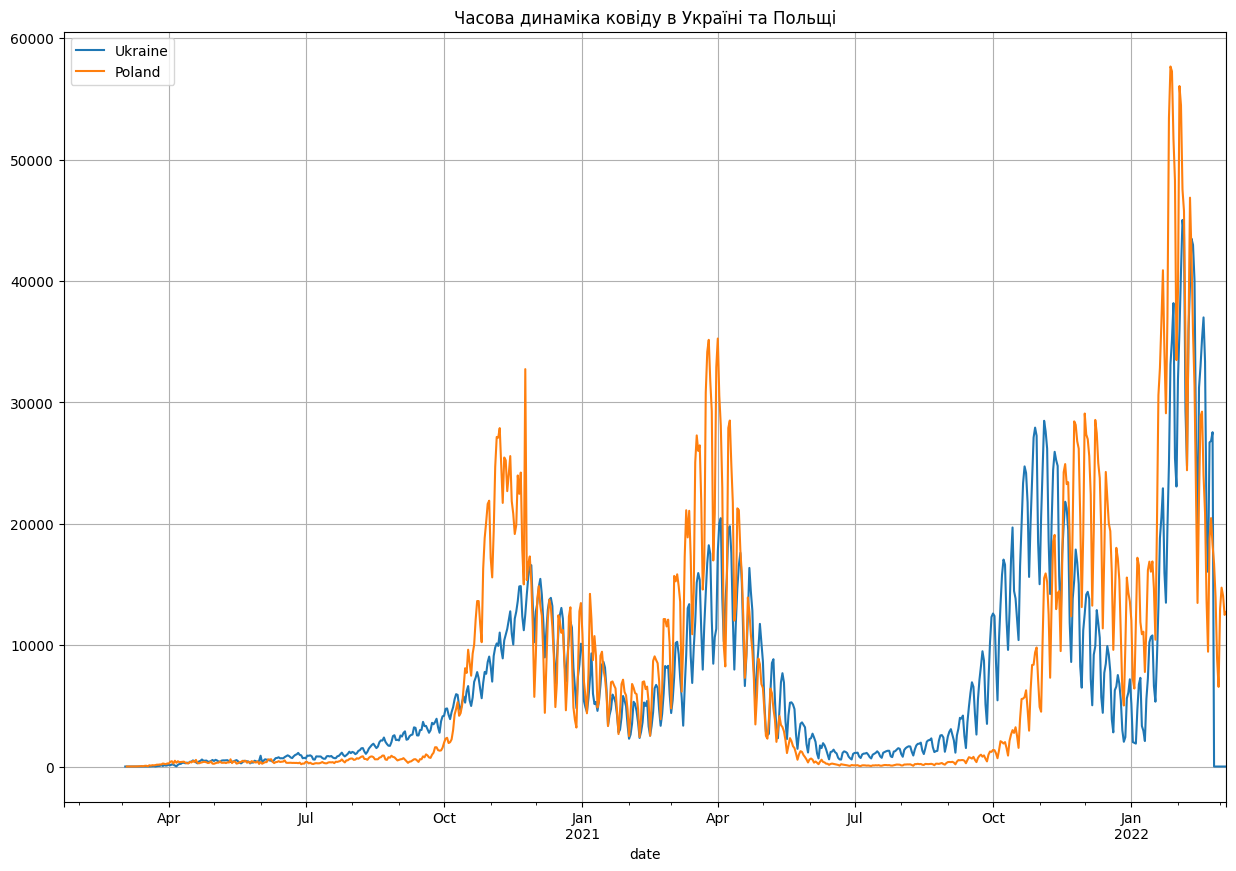

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))

covid_df[['Ukraine', 'Poland']].plot(ax=ax)
plt.title('Часова динаміка ковіду в Україні та Польщі')
ax.grid()
plt.show()

Досліджую часовий ряд ковіду у Польщі

In [ ]:
poland_covid_df = covid_df['Poland']
ukraine_covid_df = covid_df['Ukraine']

In [ ]:
poland_covid_df.describe()

count      732.000000
mean      7833.389344
std      10541.095341
min          0.000000
25%        352.750000
50%       2264.000000
75%      12734.500000
max      57659.000000
Name: Poland, dtype: float64

In [ ]:
ukraine_covid_df.describe()

count      733.000000
mean      6876.559345
std       8075.914105
min          0.000000
25%       1048.000000
50%       3889.000000
75%      10138.000000
max      45022.000000
Name: Ukraine, dtype: float64

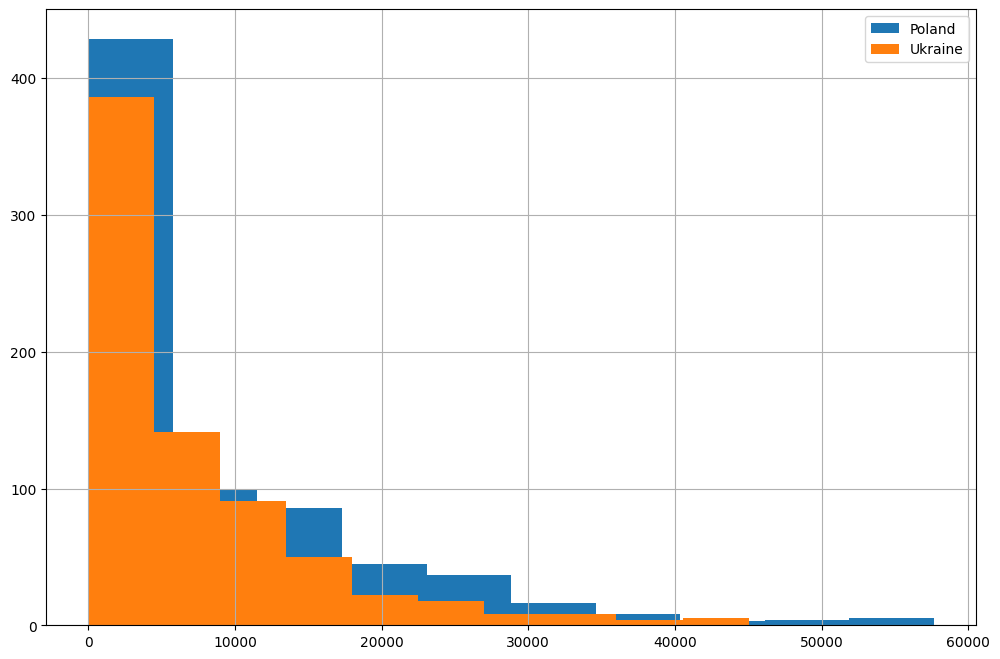

In [ ]:
poland_covid_df.hist(figsize=(12, 8), label='Poland')
ukraine_covid_df.hist(figsize=(12, 8), label='Ukraine')
plt.legend()
plt.show()

Для кращої візуалізації властивостей ряду (трендів, сезонності тощо) застосую згладжування за допомогою ковзаючого середнього

In [ ]:
def plot_moving_average(series, n):
    rolling_mean = series.rolling(window=n).mean()
    plt.figure(figsize=(15, 5))
    plt.title(f'Moving average\n window size = {n}')
    plt.plot(series[n:], label='Actual values')
    plt.plot(rolling_mean, c='orange', label='Rolling mean trend')
    plt.legend(loc='upper left')
    plt.grid(True)

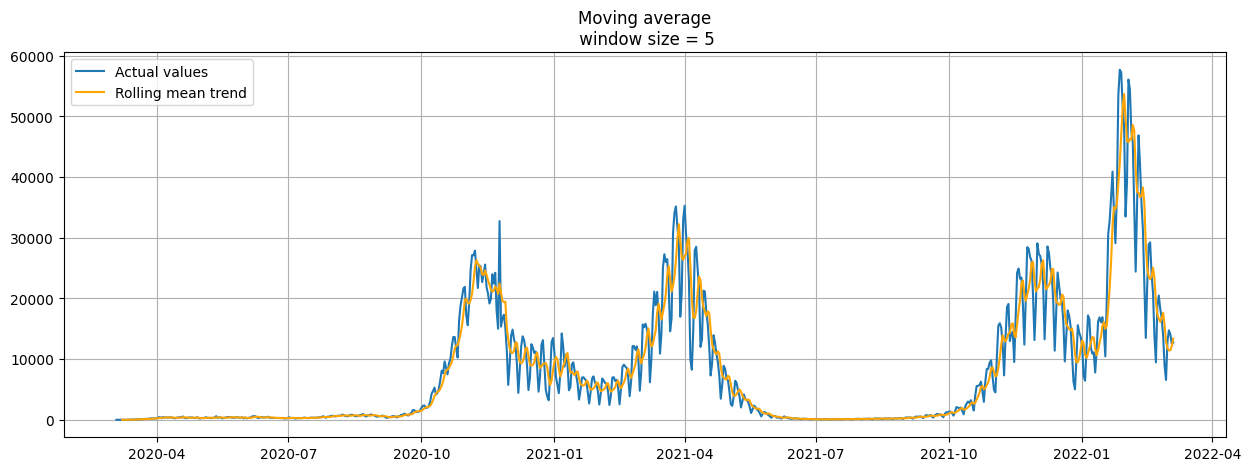

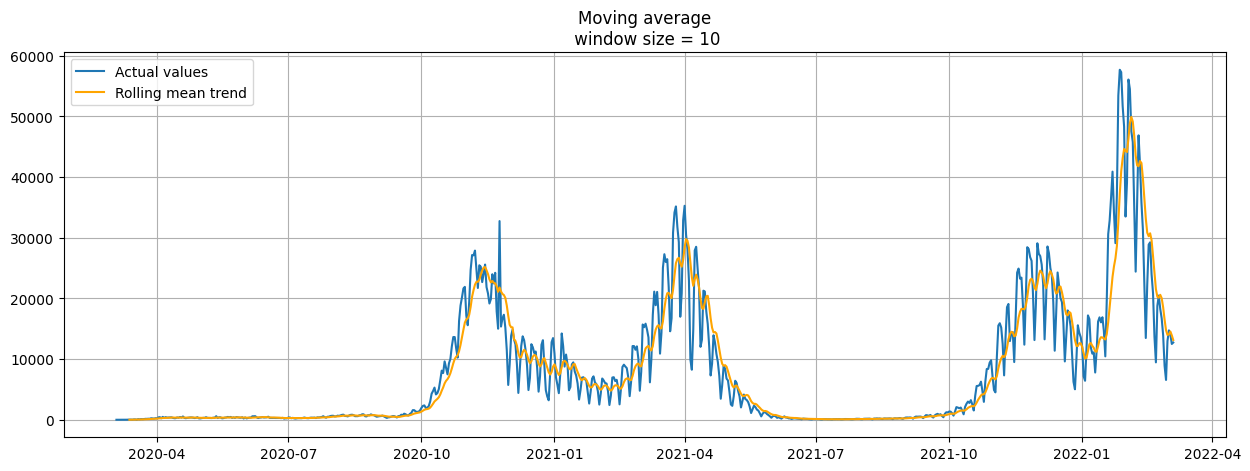

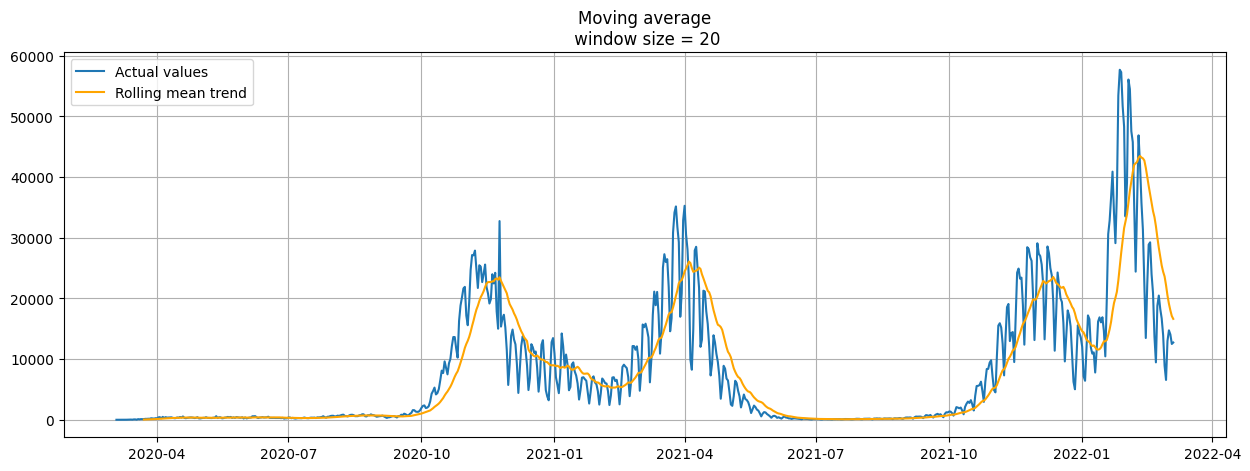

In [ ]:
# Побудова графіків для poland_covid_df
plot_moving_average(poland_covid_df, 5)
plot_moving_average(poland_covid_df, 10)
plot_moving_average(poland_covid_df, 20)

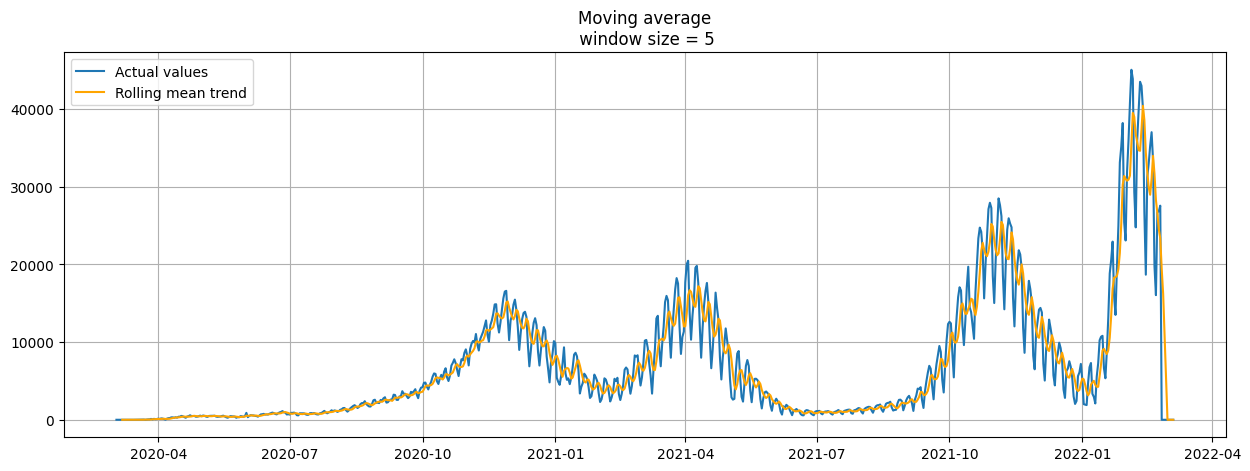

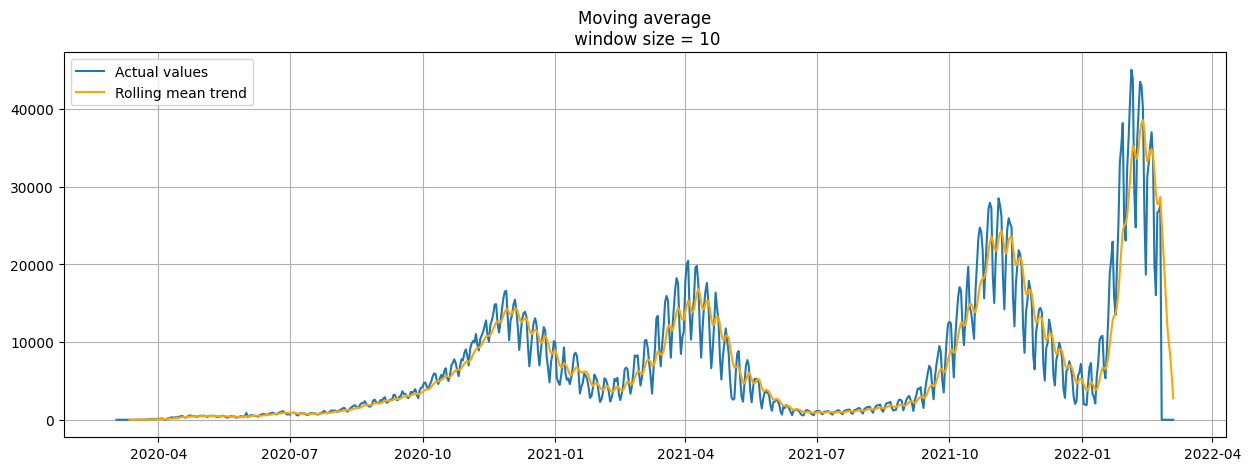

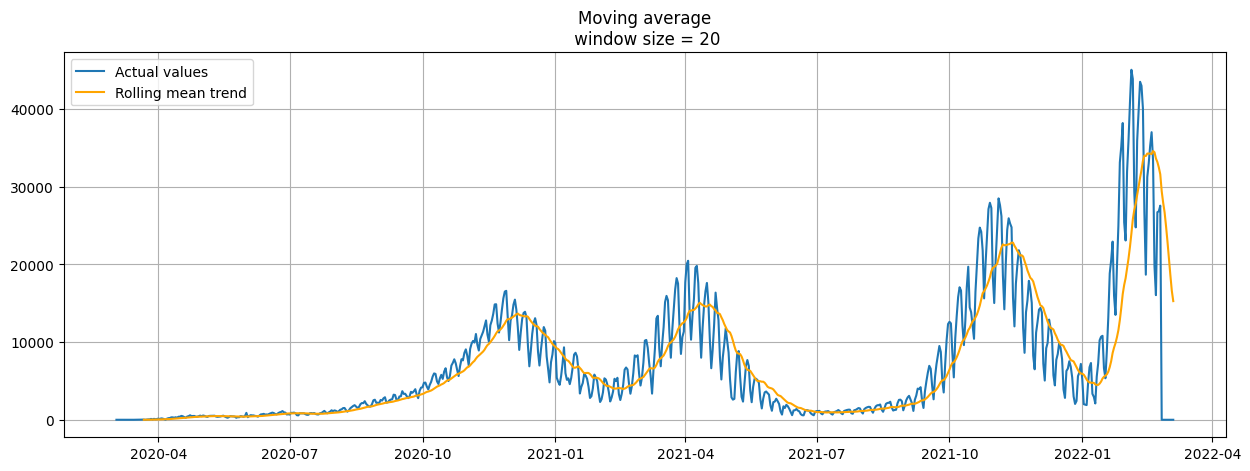

In [ ]:
# Побудова графіків для ukraine_covid_df
plot_moving_average(ukraine_covid_df, 5)
plot_moving_average(ukraine_covid_df, 10)
plot_moving_average(ukraine_covid_df, 20)

Візуалізую декомпозицію ряду на тренд, сезонність та залишки

In [ ]:
decomposition_poland = smt.seasonal_decompose(poland_covid_df[~poland_covid_df.isna()])
decomposition_ukraine = smt.seasonal_decompose(ukraine_covid_df[~ukraine_covid_df.isna()])

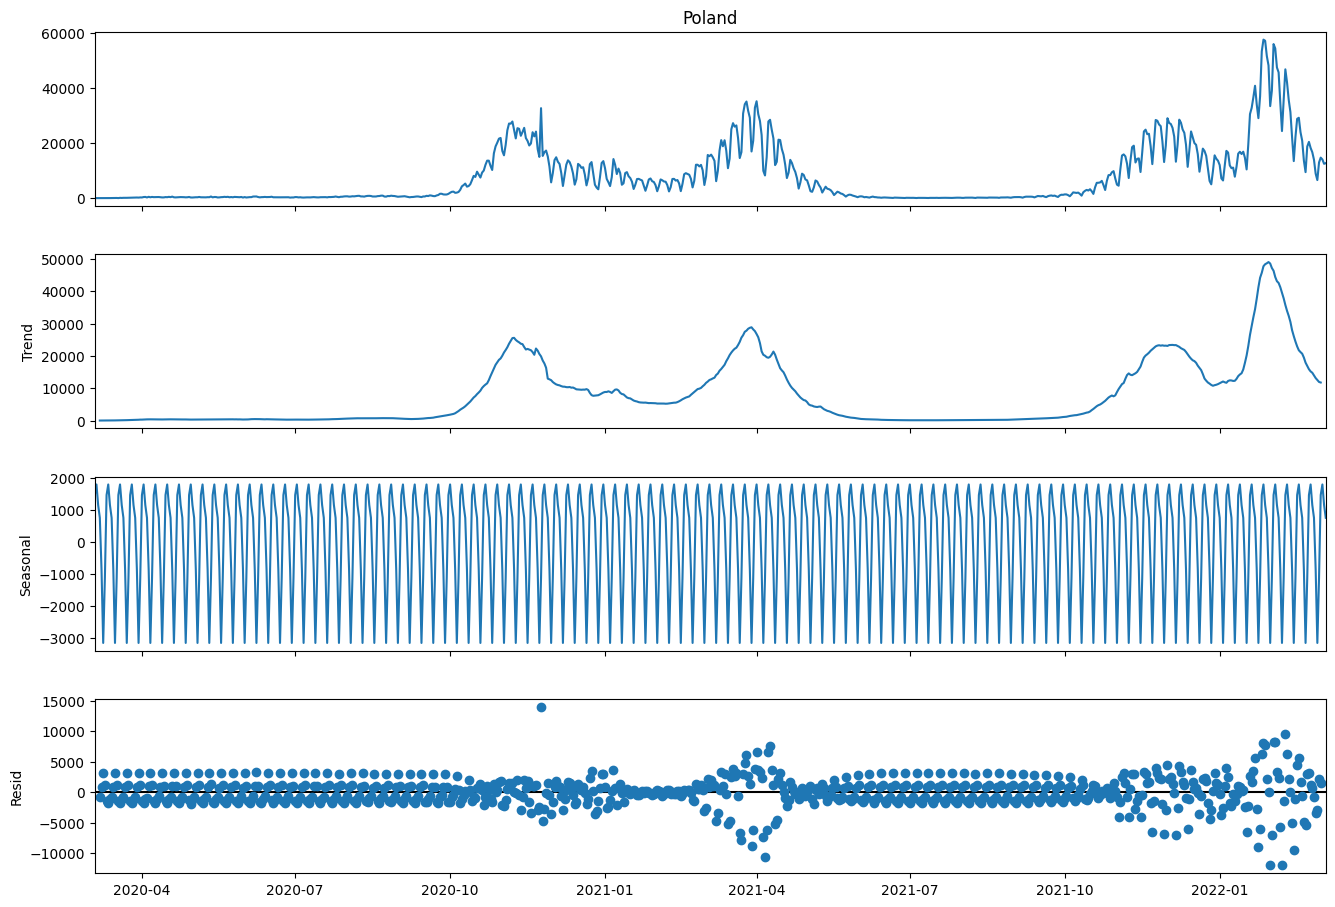

In [ ]:
fig = decomposition_poland.plot()
fig.set_size_inches(15, 10)
plt.show()

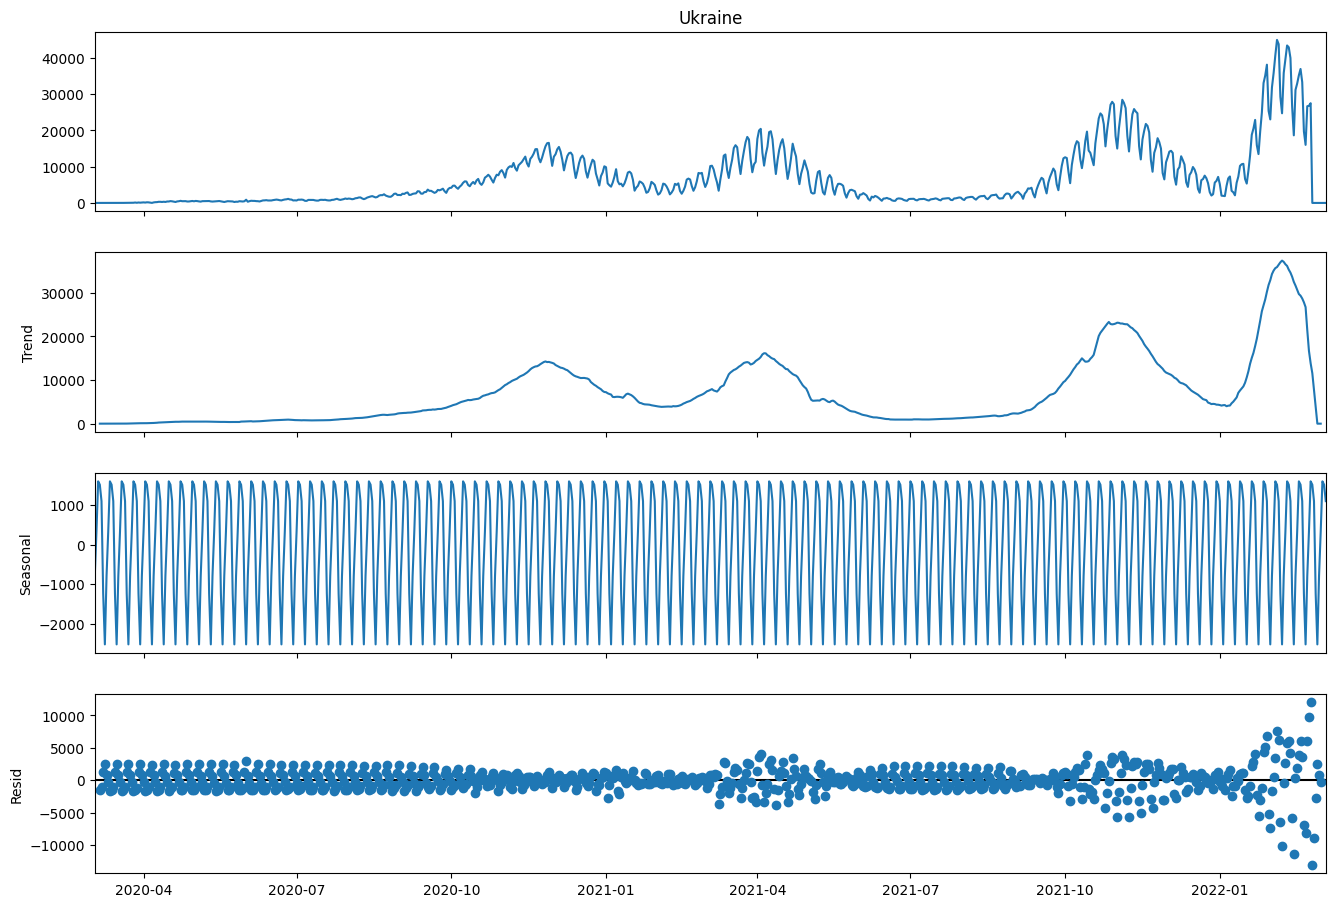

In [ ]:
fig = decomposition_ukraine.plot()
fig.set_size_inches(15, 10)
plt.show()

Будую графіки автокореляції та часткової автокореляції

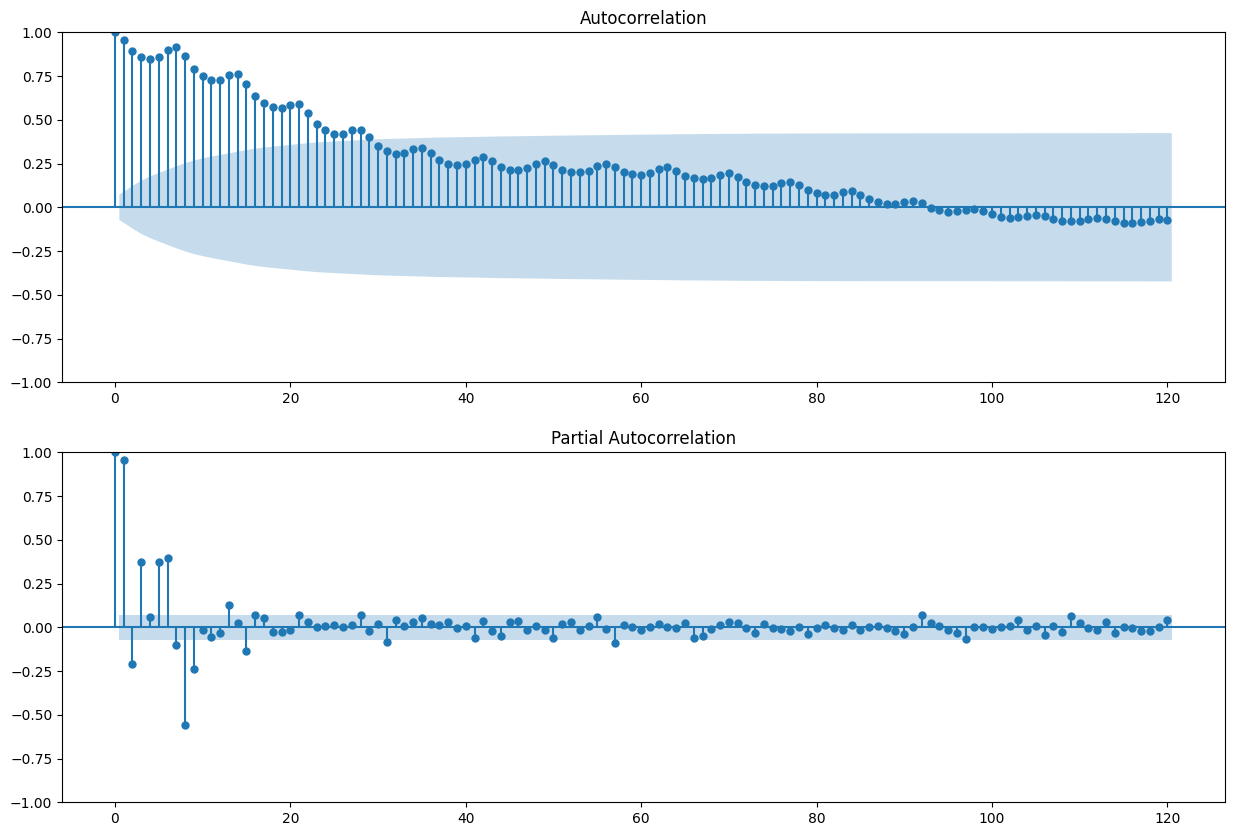

In [ ]:
fig, ax = plt.subplots(2, figsize=(15, 10))
ax[0] = plot_acf(poland_covid_df[~poland_covid_df.isna()], ax=ax[0], lags=120)
ax[1] = plot_pacf(poland_covid_df[~poland_covid_df.isna()], ax=ax[1], lags=120)

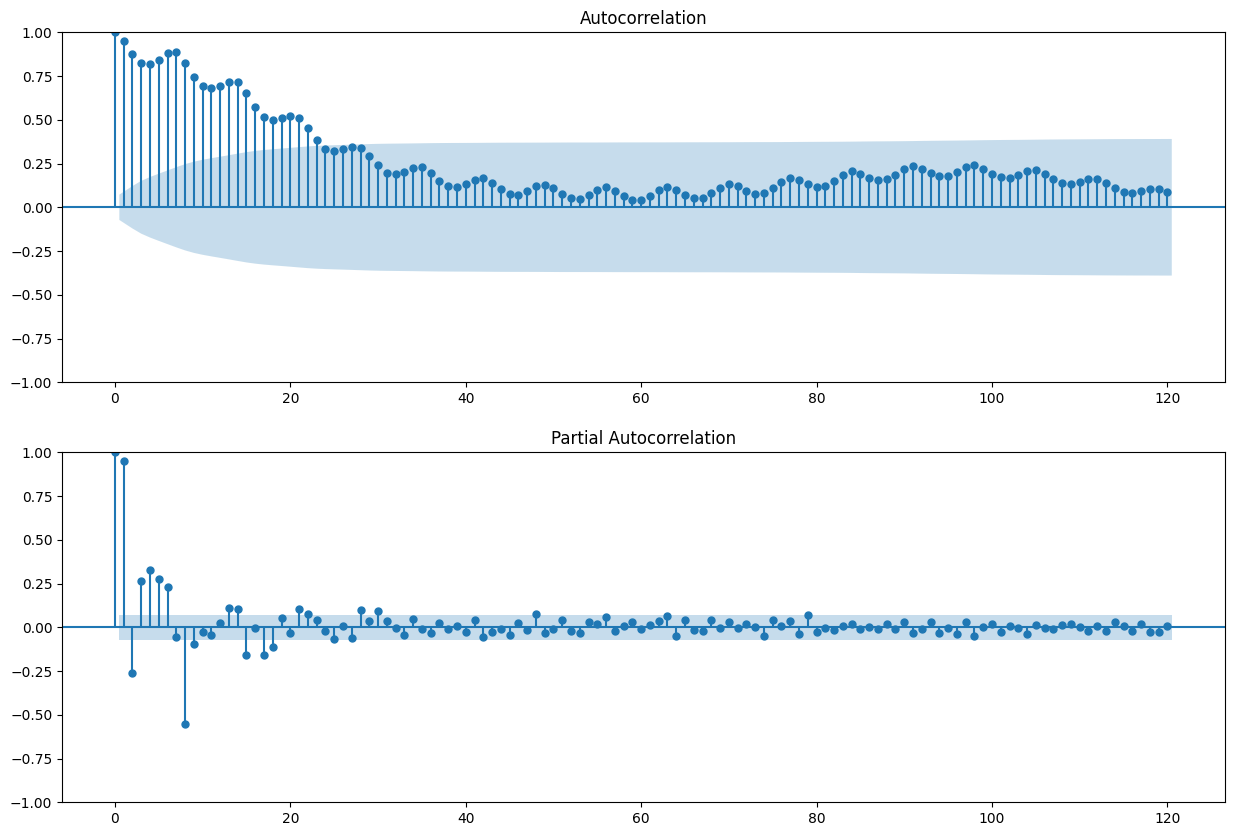

In [ ]:
fig, ax = plt.subplots(2, figsize=(15, 10))
ax[0] = plot_acf(ukraine_covid_df[~ukraine_covid_df.isna()], ax=ax[0], lags=120)
ax[1] = plot_pacf(ukraine_covid_df[~ukraine_covid_df.isna()], ax=ax[1], lags=120)

Перевірю ряд на стаціонарність за допомогою доповненого тесту Дікі-Фуллера

In [ ]:
def dickey_fuller_test(series):
    test = smt.adfuller(series, autolag='AIC')
    print('adf: ', test[0])
    print('p-value: ', test[1])
    print('Critical values: ', test[4])
    if test[0] > test[4]['5%']:
        print('Навні одиничні корені, ряд не стаціонарний.')
    else:
        print('Одиничні корені відсутні, ряд є стаціонарним.')

dickey_fuller_test(poland_covid_df[~poland_covid_df.isna()])

adf:  -3.1701010968218424
p-value:  0.021781896434064918
Critical values:  {'1%': -3.4395289262948894, '5%': -2.8655907692307694, '10%': -2.5689271030368235}
Одиничні корені відсутні, ряд є стаціонарним.


In [ ]:
dickey_fuller_test(ukraine_covid_df[~ukraine_covid_df.isna()])

adf:  -4.747762443665011
p-value:  6.838317888196062e-05
Critical values:  {'1%': -3.4395677423210493, '5%': -2.8656078730509784, '10%': -2.5689362152032573}
Одиничні корені відсутні, ряд є стаціонарним.


Будую матрицю кореляцій для значень ковіду по країнах

In [ ]:
covid_corrmat1 = covid_df.corr()

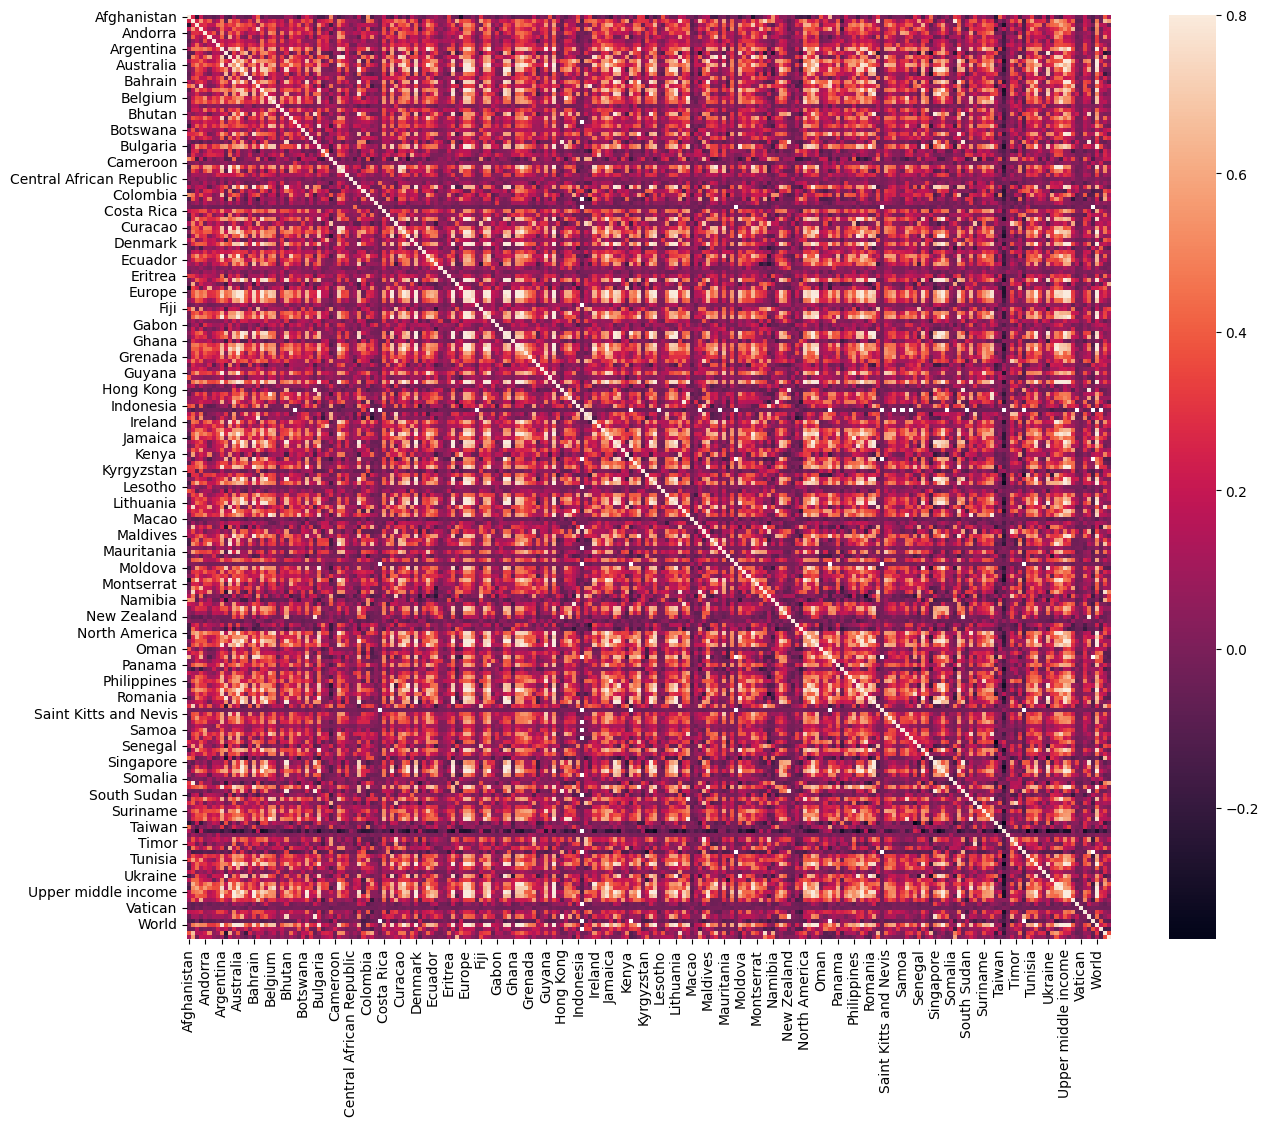

In [ ]:
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(covid_corrmat1, vmax=.8, square=True)
plt.show()

In [ ]:
covid_corrmat2 = covid_df[['Ukraine', 'Moldova', 'Poland', 'Germany', 'United States', 'Canada', 'Africa', 'Japan']].corr()

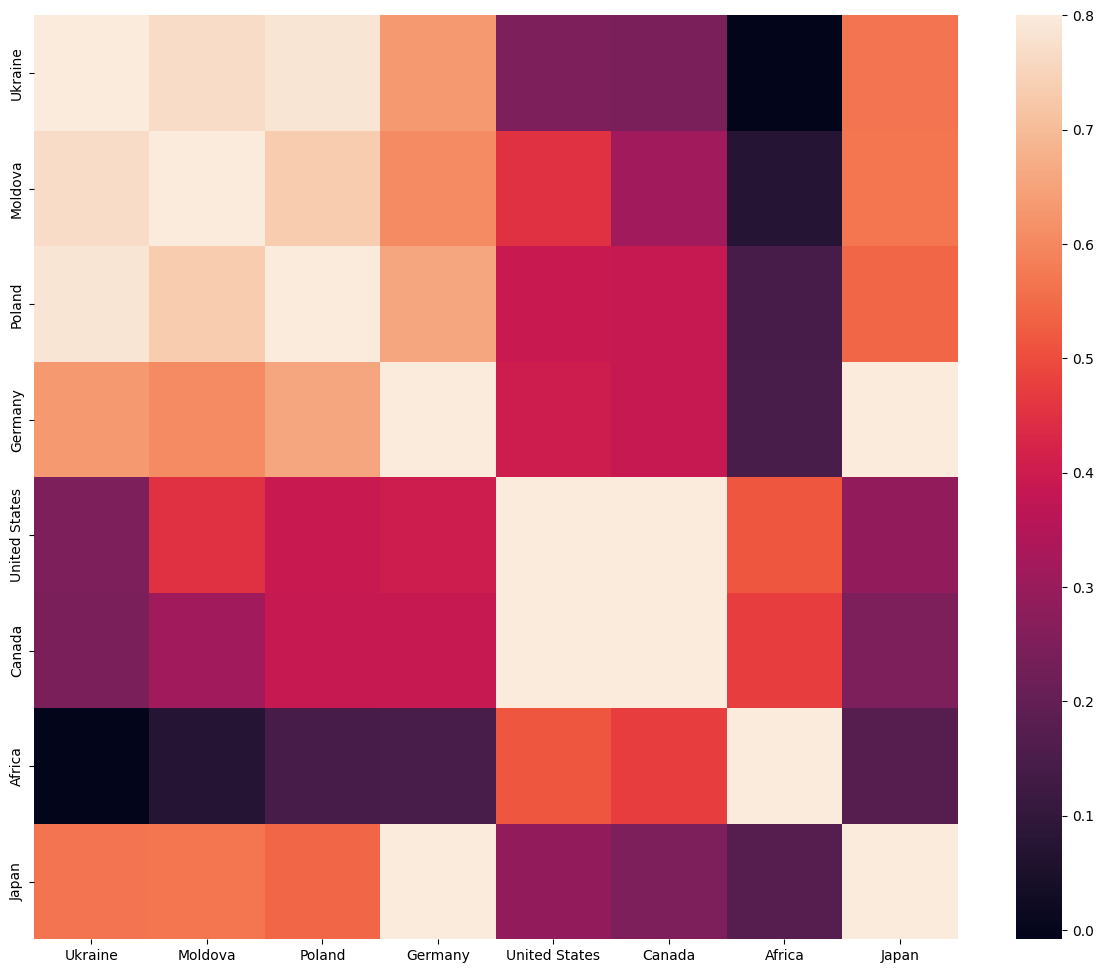

In [ ]:
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(covid_corrmat2, vmax=.8, square=True)
plt.show()

Як можна побачити, зазвичай, сусідні країни або країни з одного регіону більше корелюють.

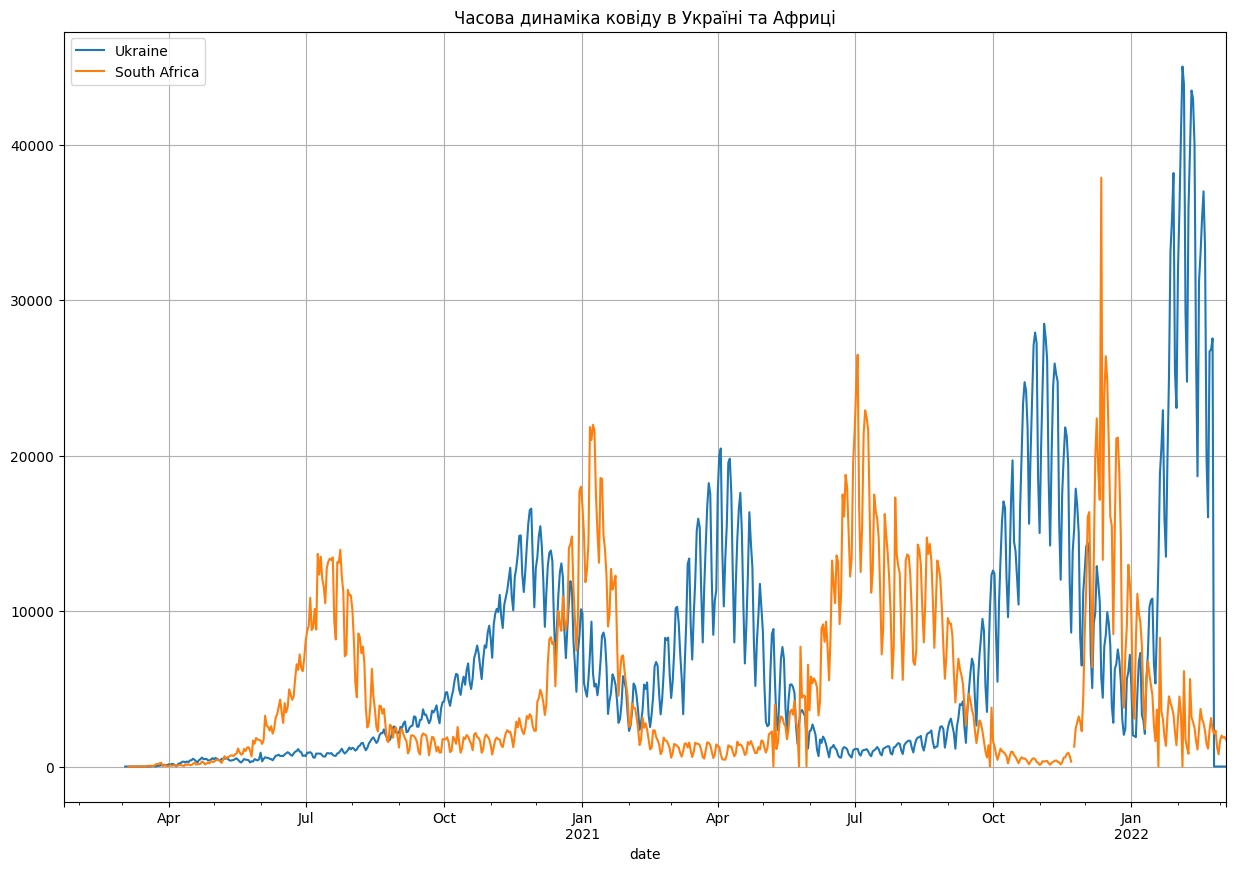

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))

covid_df[['Ukraine', 'South Africa']].plot(ax=ax)
plt.title('Часова динаміка ковіду в Україні та Африці')
ax.grid()
plt.show()

## <h2>Завдання 2</h2>

Побудувати та проаналізувати часовий ряд для курсу гривня/долар або гривня/євро за останні 3 роки (дані взяти в інтернеті).

Зчитую дані котировок валют

In [ ]:
filename = "/content/drive/My Drive/USD_UAH.csv"

def date_parser(date):
    return pd.to_datetime(date, format='%d.%m.%Y').strftime('%Y-%m-%d')

currencies_df0 = pd.read_csv(filename, index_col=['Дата'], parse_dates=['Дата'], date_parser=date_parser)
currencies_df0.sort_index(inplace=True)
currencies_df0

<ipython-input-387-2bd07af135e1>:6: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  currencies_df0 = pd.read_csv(filename, index_col=['Дата'], parse_dates=['Дата'], date_parser=date_parser)


,Час,Код цифровий,Код літерний,Кількість одиниць,Назва валюти,"Офіційний курс гривні, грн"
Дата,,,,,,
2021-01-01,0.0,840,USD,1,Долар США,28.2746
2021-01-02,0.0,840,USD,1,Долар США,28.2746
2021-01-03,0.0,840,USD,1,Долар США,28.2746
2021-01-04,0.0,840,USD,1,Долар США,28.2746
2021-01-05,0.0,840,USD,1,Долар США,28.4310
...,...,...,...,...,...,...
2024-05-07,0.0,840,USD,1,Долар США,39.3561
2024-05-08,0.0,840,USD,1,Долар США,39.2966
2024-05-09,0.0,840,USD,1,Долар США,39.3828


In [ ]:
currencies_df = currencies_df0[['Офіційний курс гривні, грн']]
currencies_df.rename(columns={'Офіційний курс гривні, грн': 'курс'}, inplace=True)
currencies_df

<ipython-input-388-78ff8a3ed650>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  currencies_df.rename(columns={'Офіційний курс гривні, грн': 'курс'}, inplace=True)


,курс
Дата,
2021-01-01,28.2746
2021-01-02,28.2746
2021-01-03,28.2746
2021-01-04,28.2746
2021-01-05,28.4310
...,...
2024-05-07,39.3561
2024-05-08,39.2966
2024-05-09,39.3828


Будую динаміку курсу за добу

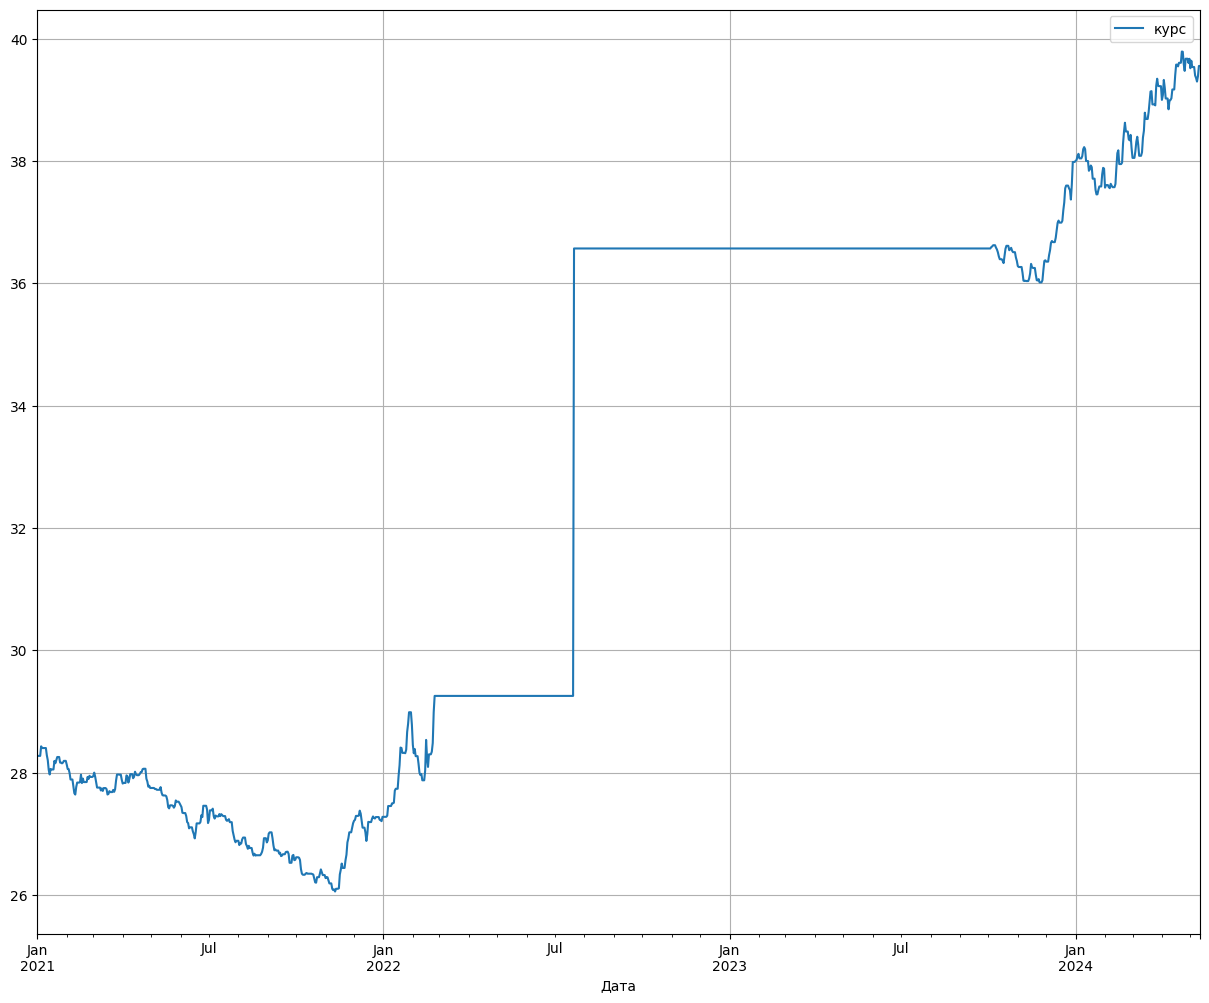

In [ ]:
fig, ax = plt.subplots(figsize=(15, 12))

currencies_df[['курс']].plot(ax=ax, subplots=True)
ax.grid()
plt.show()

Використовую згладжування для дослідження характеристик ряду

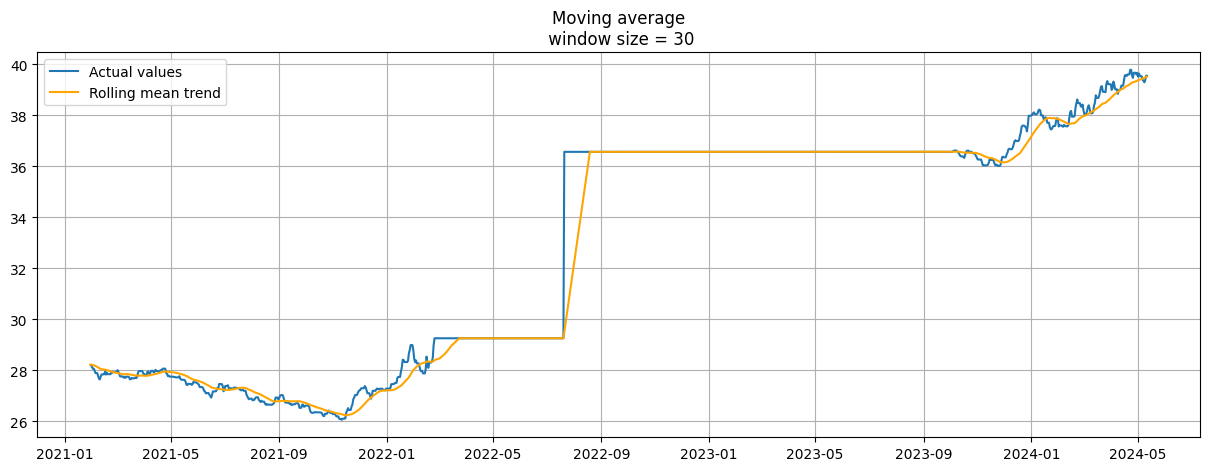

In [ ]:
plot_moving_average(currencies_df['курс'], 30)

Створюю декомпозицію ціни на тренд, сезонність і залишки

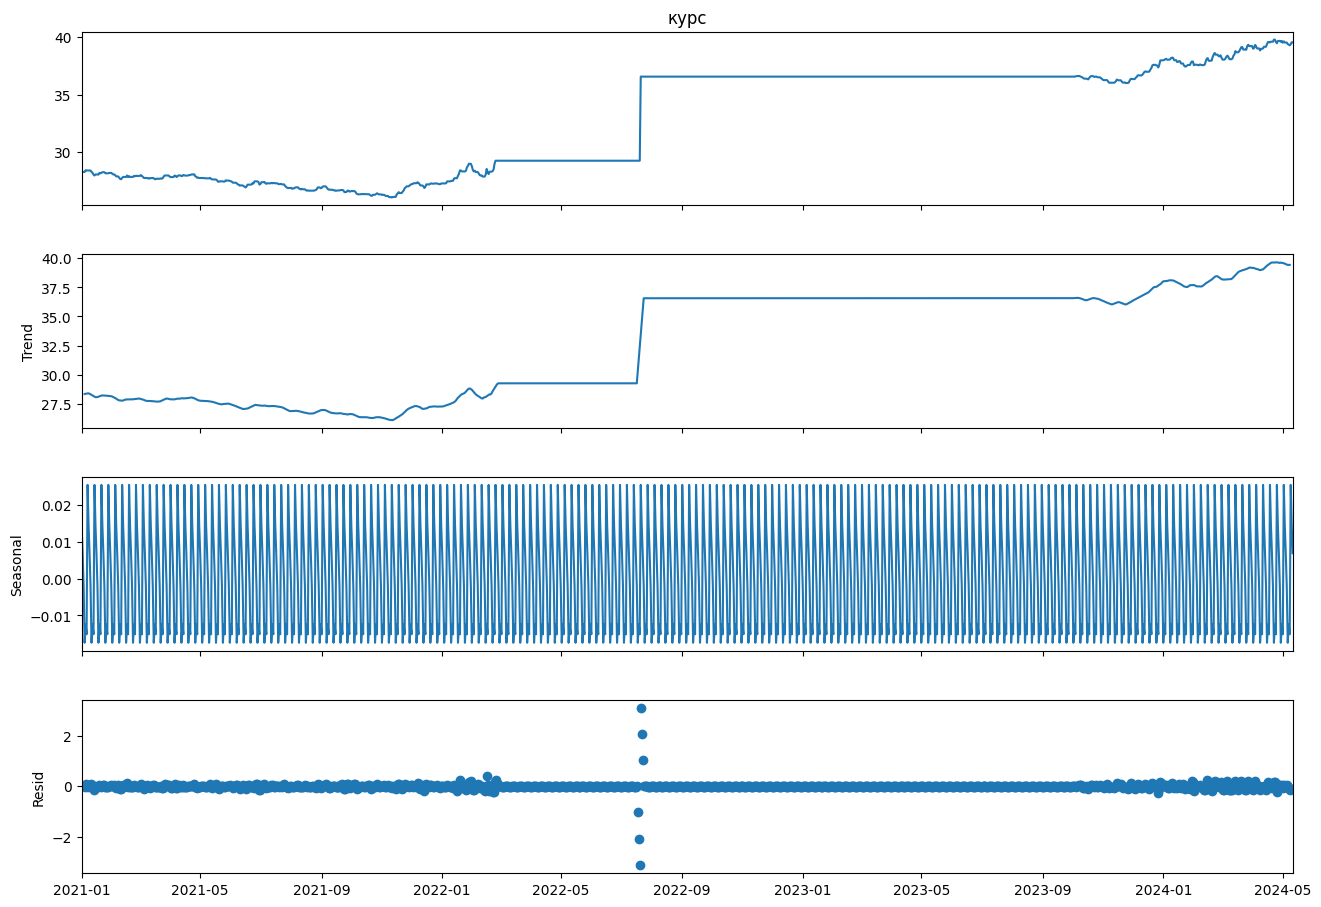

In [ ]:
price_decomposition = smt.seasonal_decompose(currencies_df['курс'])
fig = price_decomposition.plot()
fig.set_size_inches(15, 10)
plt.show()

Як бачимо, ряд має тренд, але не має сезонності.

Будую графіки автокореляції та часткової автокореляції

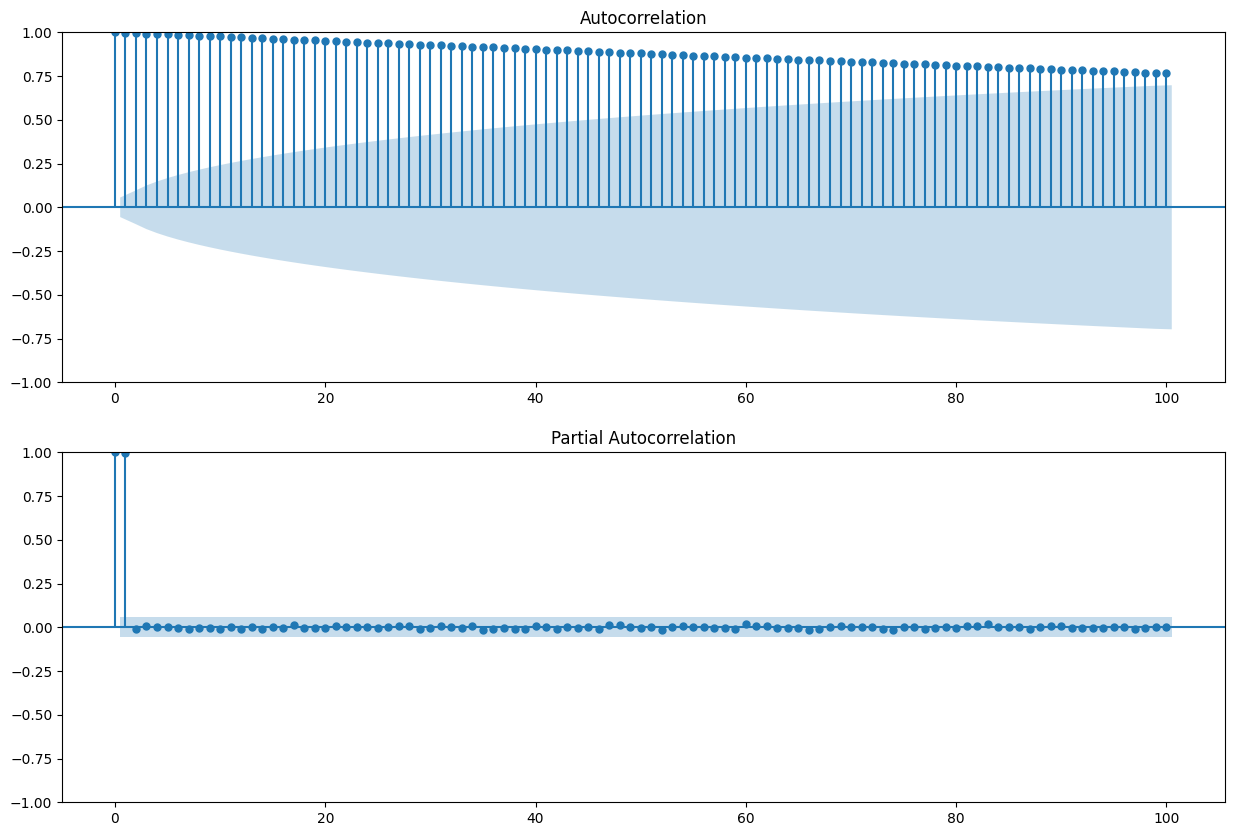

In [ ]:
fig, ax = plt.subplots(2, figsize=(15, 10))
ax[0] = plot_acf(currencies_df['курс'], ax=ax[0], lags=100)
ax[1] = plot_pacf(currencies_df['курс'], ax=ax[1], lags=100)

Перевіряю ряд на стаціонарність

In [ ]:
dickey_fuller_test(currencies_df['курс'])

adf:  -0.4625462109114708
p-value:  0.8991204622300875
Critical values:  {'1%': -3.4356950607889254, '5%': -2.863900342696613, '10%': -2.568026681232353}
Навні одиничні корені, ряд не стаціонарний.


Для того, щоб зробити ряд стаціонарним, використаю різницю

In [ ]:
currencies_price_df_diff = currencies_df['курс'].diff(periods=1).dropna()

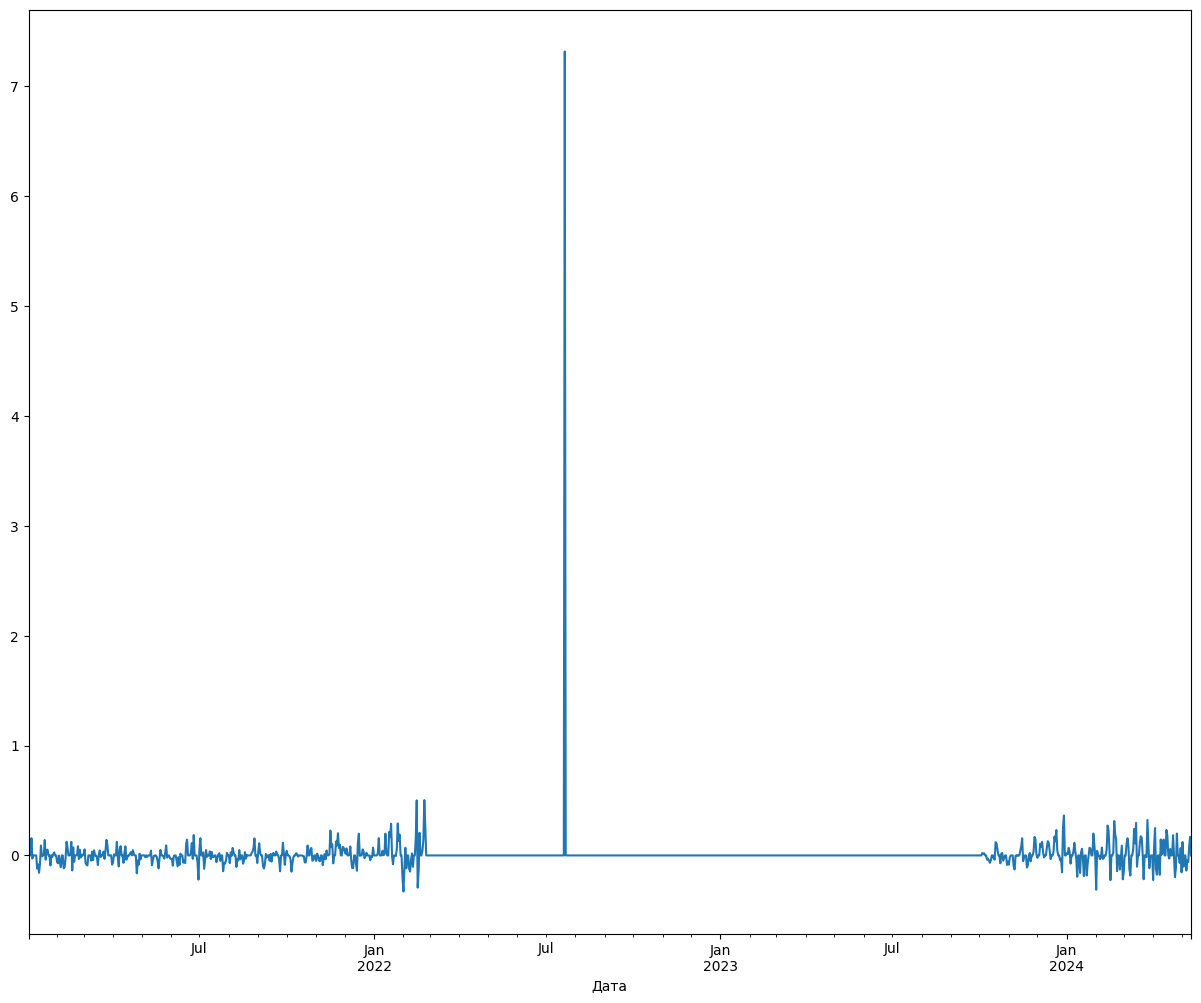

In [ ]:
fig, ax = plt.subplots(figsize=(15, 12))
currencies_price_df_diff.plot(ax=ax)
plt.show()

In [ ]:
dickey_fuller_test(currencies_price_df_diff)

adf:  -34.238614162315685
p-value:  0.0
Critical values:  {'1%': -3.435699433298302, '5%': -2.863902271843875, '10%': -2.5680277086214076}
Одиничні корені відсутні, ряд є стаціонарним.


Різниця представляє собою стаціонарний ряд.

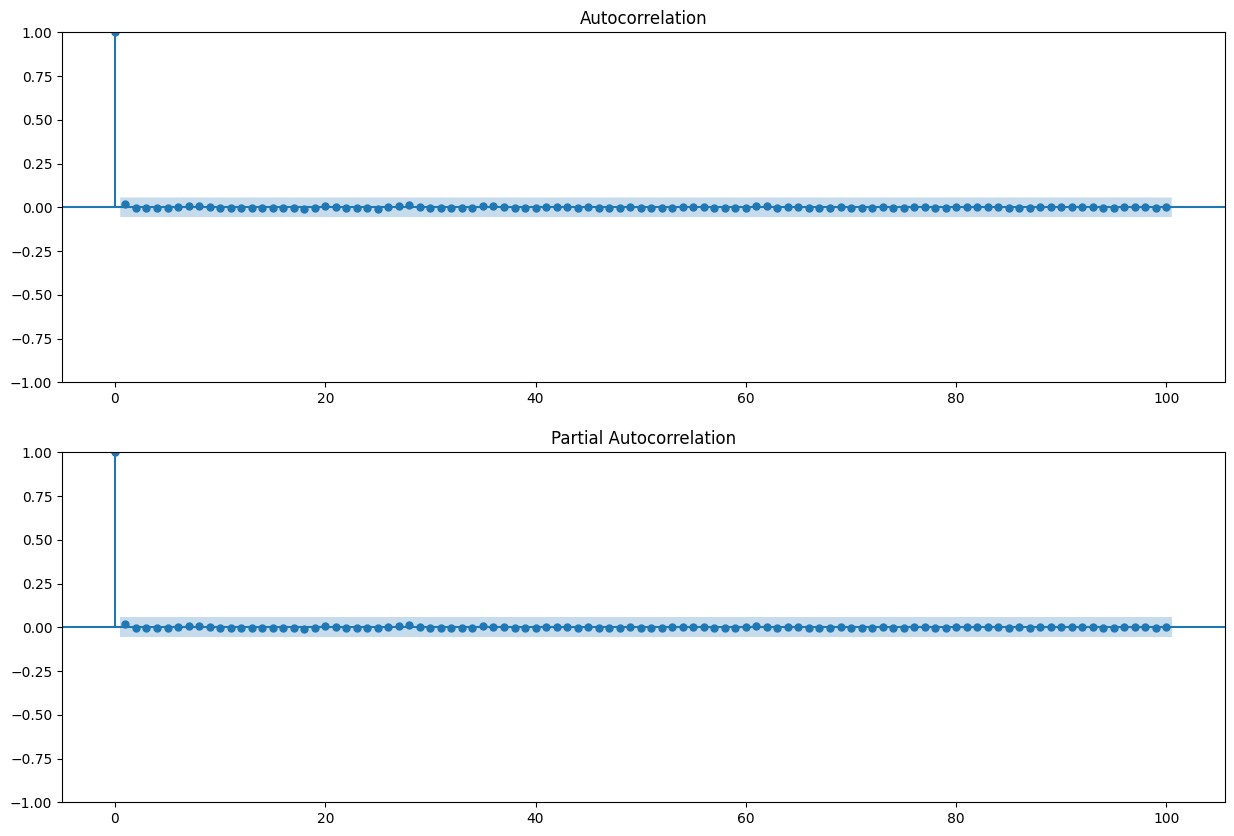

In [ ]:
fig, ax = plt.subplots(2, figsize=(15, 10))
ax[0] = plot_acf(currencies_price_df_diff, ax=ax[0], lags=100)
ax[1] = plot_pacf(currencies_price_df_diff, ax=ax[1], lags=100)

Будую модель ARIMA для прогнозу значення ціни на тиждень вперед

In [ ]:
train_data = currencies_df['курс'][:-7]
model = smt.ARIMA(train_data, order=(1, 1, 1)).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   курс   No. Observations:                 1220
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 120.915
Date:                Sat, 11 May 2024   AIC                           -235.830
Time:                        18:18:38   BIC                           -220.512
Sample:                    01-01-2021   HQIC                          -230.064
                         - 05-04-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1380      6.921     -0.020      0.984     -13.702      13.426
ma.L1          0.1607      6.921      0.023      0.981     -13.404      13.726
sigma2         0.0480   8.62e-05    556.782      0.000       0.048       0.048
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):          52380105.01
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.29   Skew:                            30.49
Prob(H) (two-sided):                  0.01   Kurtosis:                      1016.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
pred = model.predict(currencies_df['курс'].index[-7], currencies_df['курс'].index[-1])
test_data = currencies_price_df_diff[-7:]

Візуалізую прогноз та істинні значення

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['plot_insample']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


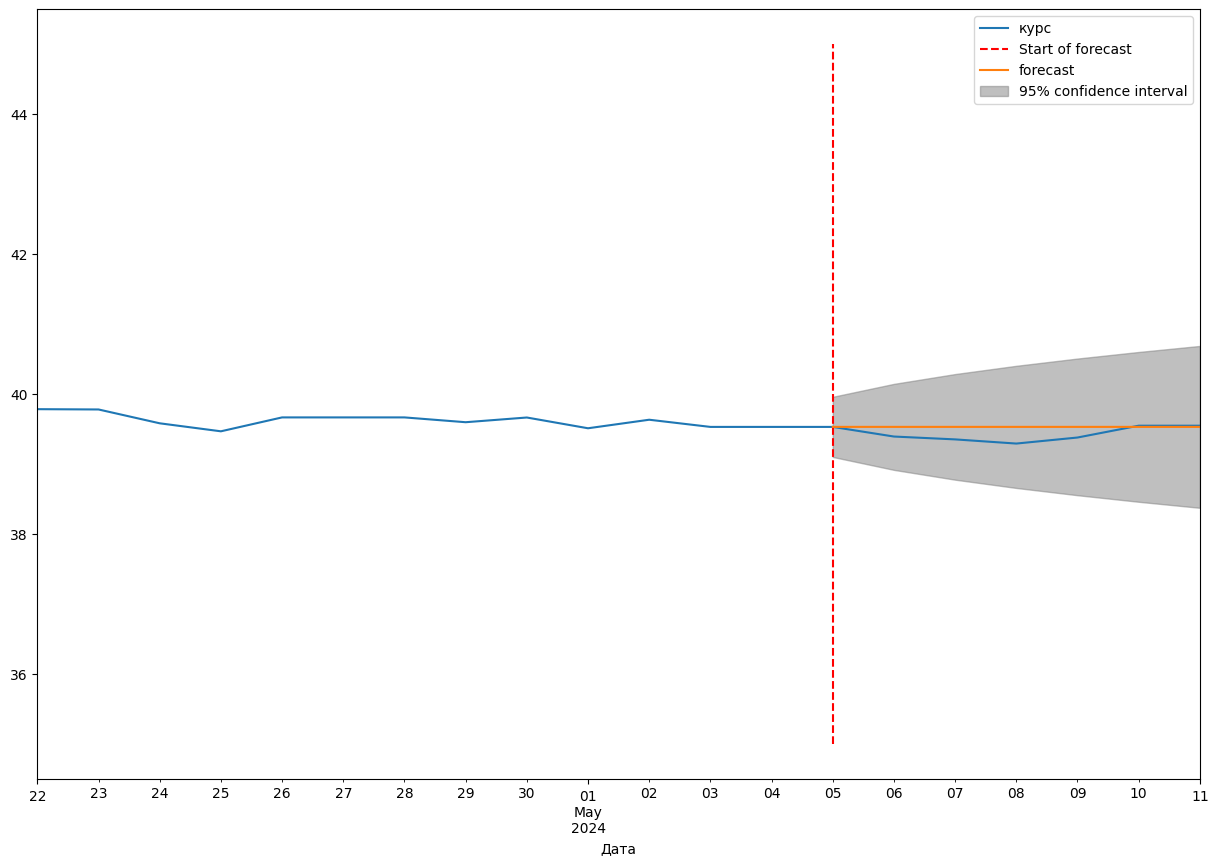

In [ ]:
from statsmodels.graphics.tsaplots import plot_predict
fig, ax = plt.subplots(figsize=(15, 10))
currencies_df['курс'][-20:].plot(ax=ax)
ax.vlines(currencies_df['курс'].index[-7], 35, 45, linestyle='--', color='r', label='Start of forecast')
ax = plot_predict(model, currencies_df['курс'].index[-7], currencies_df['курс'].index[-1], dynamic=True, plot_insample=False, ax=ax)

Значення прогнозів

In [ ]:
forecasts = model.forecast(7)
forecasts

2024-05-05    39.534961
2024-05-06    39.534898
2024-05-07    39.534907
2024-05-08    39.534905
2024-05-09    39.534906
2024-05-10    39.534906
2024-05-11    39.534906
Freq: D, Name: predicted_mean, dtype: float64

## <h2>Додаткове завдання</h2>

Потрібно з'ясувати, чи є сезонна компонента в кількості опадів в Сіетлі (файл seattleWeather_1948-2017.csv).
* Градуси перевести в Цельсії.
* Чи є кореляція між температурою та опадами?
* Скласти прогноз опадів на 2018 рік, оцінити точність прогнозу

Завантажую дані з файлу

In [ ]:
filename = "/content/drive/My Drive/seattleWeather_1948-2017.csv"
w_df = pd.read_csv(filename, index_col=['DATE'], parse_dates=['DATE'])

In [ ]:
w_df

,PRCP,TMAX,TMIN,RAIN
DATE,,,,
1948-01-01,0.47,51,42,True
1948-01-02,0.59,45,36,True
1948-01-03,0.42,45,35,True
1948-01-04,0.31,45,34,True
1948-01-05,0.17,45,32,True
...,...,...,...,...
2017-12-10,0.00,49,34,False
2017-12-11,0.00,49,29,False
2017-12-12,0.00,46,32,False


In [ ]:
w_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25551 entries, 1948-01-01 to 2017-12-14
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PRCP    25548 non-null  float64
 1   TMAX    25551 non-null  int64  
 2   TMIN    25551 non-null  int64  
 3   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 998.1+ KB


Переводжу градуси по Фаренгейту в Цельсії

In [ ]:
w_df['TMAX_C'] = (w_df['TMAX'] - 32) * 5/9
w_df['TMIN_C'] = (w_df['TMIN'] - 32) * 5/9
w_df

,PRCP,TMAX,TMIN,RAIN,TMAX_C,TMIN_C
DATE,,,,,,
1948-01-01,0.47,51,42,True,10.555556,5.555556
1948-01-02,0.59,45,36,True,7.222222,2.222222
1948-01-03,0.42,45,35,True,7.222222,1.666667
1948-01-04,0.31,45,34,True,7.222222,1.111111
1948-01-05,0.17,45,32,True,7.222222,0.000000
...,...,...,...,...,...,...
2017-12-10,0.00,49,34,False,9.444444,1.111111
2017-12-11,0.00,49,29,False,9.444444,-1.666667
2017-12-12,0.00,46,32,False,7.777778,0.000000


Знаходжу кореляцію між температурою та опадами

In [ ]:
correlation_PRCP_TMAX = w_df['PRCP'].corr(w_df['TMAX'])
correlation_PRCP_TMIN = w_df['PRCP'].corr(w_df['TMIN'])

print("Кореляція між опадами та максимальною температурою:", correlation_PRCP_TMAX)
print("Кореляція між опадами та мінімальною температурою:", correlation_PRCP_TMIN)

Кореляція між опадами та максимальною температурою: -0.2267358489871366
Кореляція між опадами та мінімальною температурою: -0.06436548670993131


Бачимо, що кореляція є незначною. Це означає, що кількість опадів майже не залежить від температури.

Візуалізовую динаміку опадів у часі

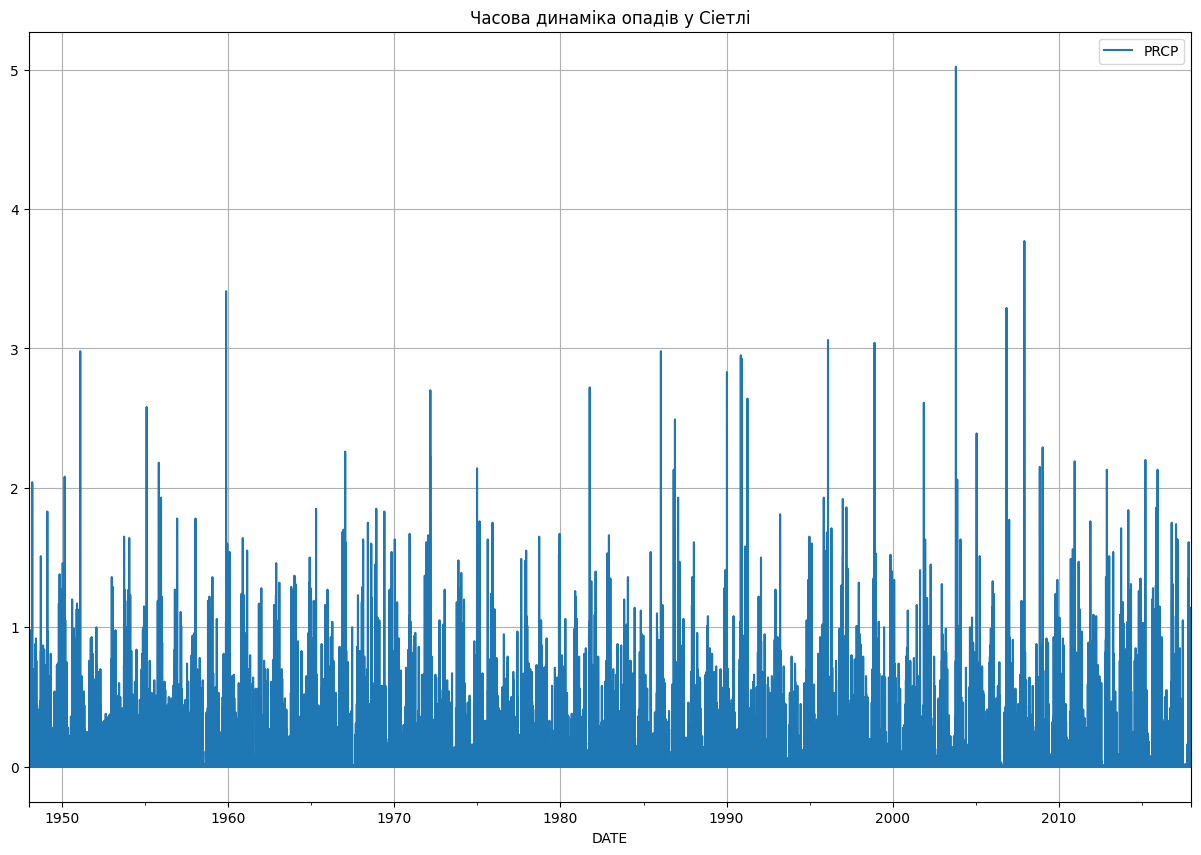

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))

w_df[['PRCP']].plot(ax=ax)
plt.title('Часова динаміка опадів у Сіетлі')
ax.grid()
plt.show()

Використовую згладжування для дослідження характеристик ряду

<ipython-input-426-90198cd73309>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prcp_df.fillna(0, inplace=True)


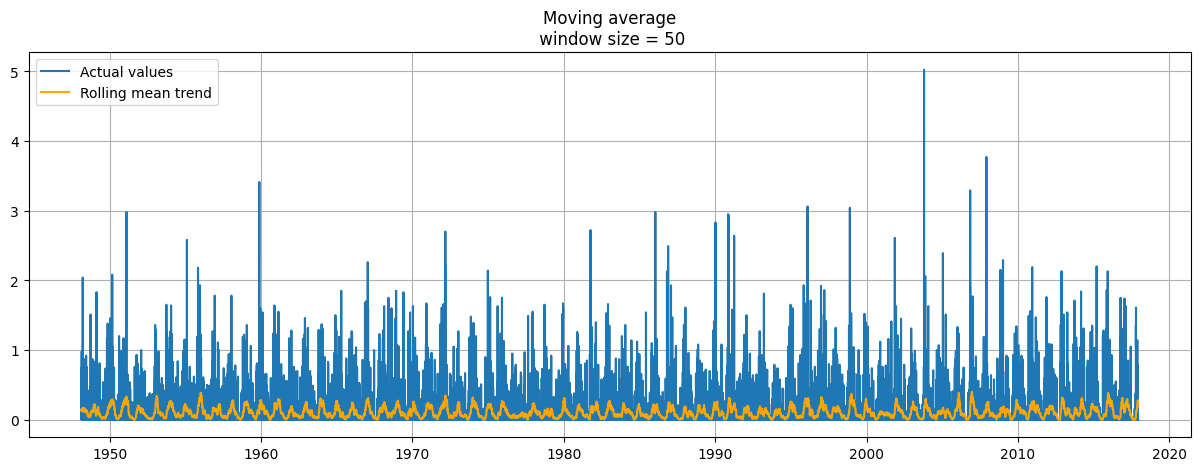

In [ ]:
prcp_df = w_df[['PRCP']]
prcp_df.fillna(0, inplace=True)
plot_moving_average(prcp_df, 50)

Створюю декомпозицію ціни на тренд, сезонність і залишки

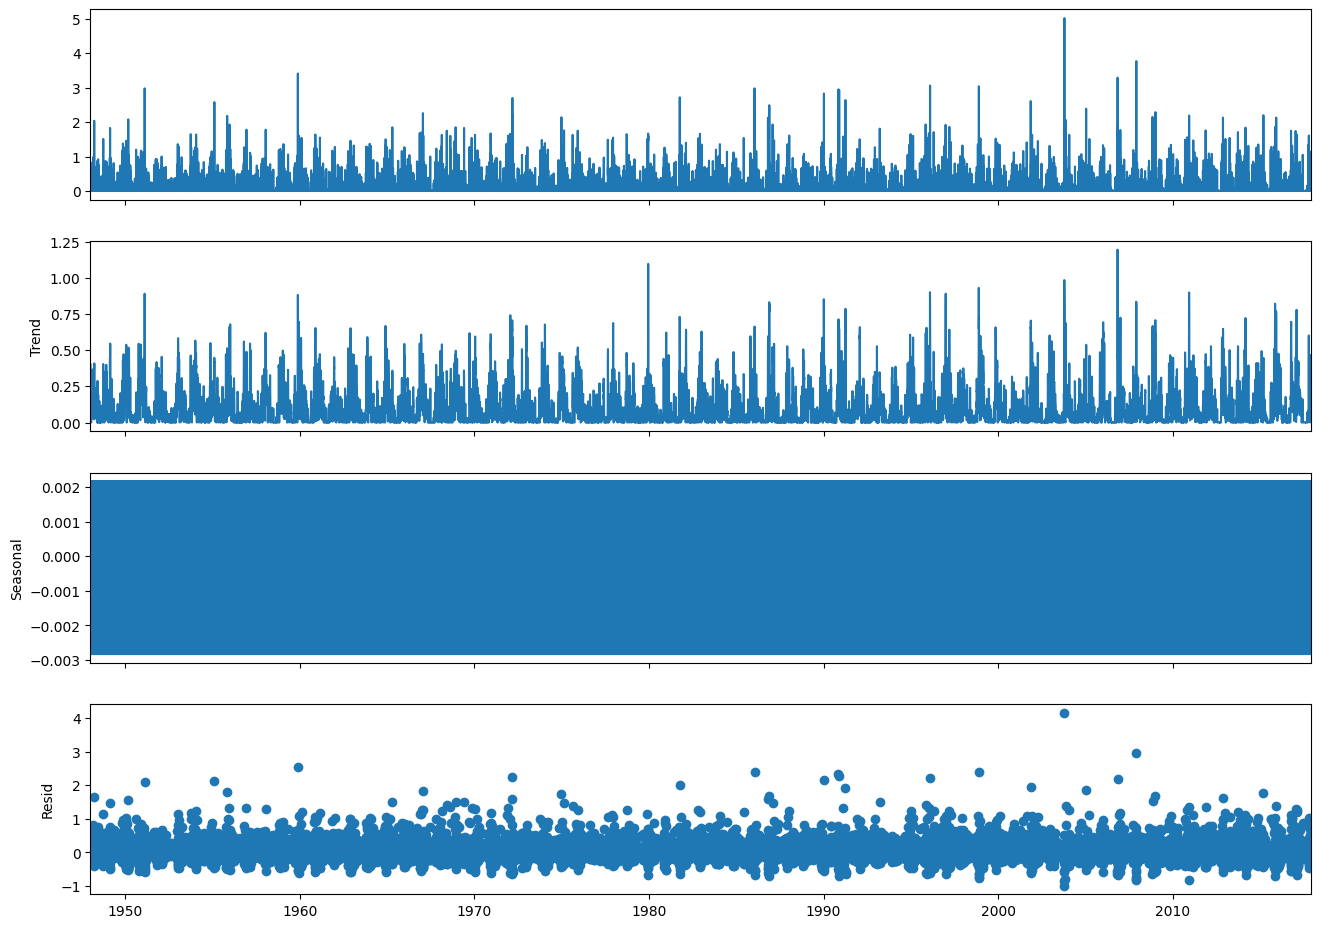

In [ ]:
prcp_decomposition = smt.seasonal_decompose(prcp_df)
fig = prcp_decomposition.plot()
fig.set_size_inches(15, 10)
plt.show()

Будую графіки автокореляції та часткової автокореляції

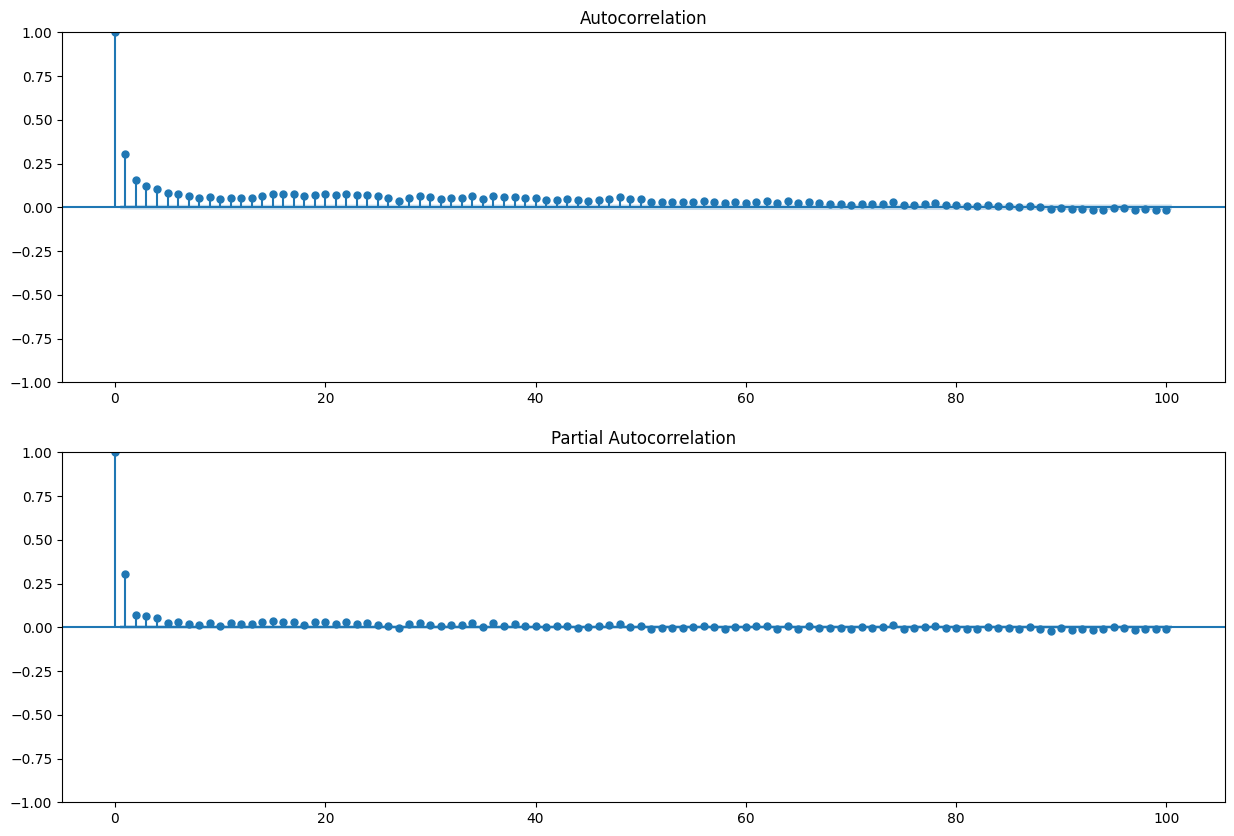

In [ ]:
fig, ax = plt.subplots(2, figsize=(15, 10))
ax[0] = plot_acf(prcp_df, ax=ax[0], lags=100)
ax[1] = plot_pacf(prcp_df, ax=ax[1], lags=100)

Перевіряю ряд на стаціонарність

In [ ]:
dickey_fuller_test(prcp_df)

adf:  -16.928289719325868
p-value:  9.82108979209554e-30
Critical values:  {'1%': -3.4306063382613226, '5%': -2.8616532938508263, '10%': -2.5668303029867414}
Одиничні корені відсутні, ряд є стаціонарним.


Будую модель ARIMA для прогнозу значення ціни на рік вперед

In [ ]:
# prcp_model = smt.ARIMA(prcp_df, order=(1, 1, 1))
# prcp_arima_model = prcp_model.fit()
prcp_model = smt.ARIMA(prcp_df, order=(1, 1, 1)).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
prcp_pred = prcp_model.predict()
# test_data = currencies_price_df_diff[-7:]

In [ ]:
prcp_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PRCP   No. Observations:                25551
Model:                 ARIMA(1, 1, 1)   Log Likelihood                1760.888
Date:                Sat, 11 May 2024   AIC                          -3515.777
Time:                        18:44:41   BIC                          -3491.332
Sample:                    01-01-1948   HQIC                         -3507.873
                         - 12-14-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2445      0.003     70.783      0.000       0.238       0.251
ma.L1         -0.9664      0.001   -647.228      0.000      -0.969      -0.963
sigma2         0.0510      0.000    431.382      0.000       0.051       0.051
===================================================================================
Ljung-Box (L1) (Q):                   0.99   Jarque-Bera (JB):           1261912.57
Prob(Q):                              0.32   Prob(JB):                         0.00
Heteroskedasticity (H):               1.15   Skew:                             4.11
Prob(H) (two-sided):                  0.00   Kurtosis:                        36.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Візуалізую прогноз та істинні значення

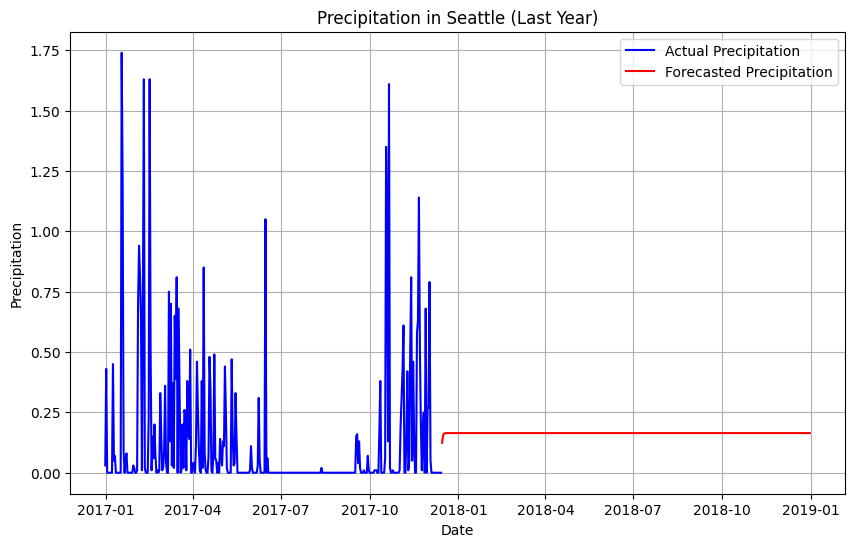

In [ ]:
# Прогноз на 2018 рік
forecast_dates = pd.date_range(start='2017-12-15', end='2018-12-31', freq='D')
forecast = prcp_model.forecast(steps=len(forecast_dates))

# Створення pd.Series з прогнозованими даними
forecast_series = pd.Series(index=forecast_dates, data=forecast)

# Побудова графіку
plt.figure(figsize=(10, 6))
last_year_data = prcp_df.loc['2016-12-31':'2018-12-31']
plt.plot(last_year_data.index, last_year_data['PRCP'], label='Actual Precipitation', color='blue')
plt.plot(forecast_series.index, forecast_series, label='Forecasted Precipitation', color='red')
plt.title('Precipitation in Seattle (Last Year)')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.legend()
plt.grid(True)
plt.show()

Значення прогнозів

In [ ]:
prcp_forecast = prcp_model.forecast(steps=365)

In [ ]:
prcp_forecast

2017-12-15    0.124023
2017-12-16    0.154348
2017-12-17    0.161764
2017-12-18    0.163577
2017-12-19    0.164020
                ...   
2018-12-10    0.164164
2018-12-11    0.164164
2018-12-12    0.164164
2018-12-13    0.164164
2018-12-14    0.164164
Freq: D, Name: predicted_mean, Length: 365, dtype: float64

Обрахунок похидки прогнозу через Середньоквадратичне відхилення(MSE)

In [ ]:
from sklearn.metrics import mean_squared_error

forecast = prcp_model.get_forecast(steps=7)

observed_data = prcp_df[-7:]

predicted_data = forecast.predicted_mean

mse = mean_squared_error(observed_data, predicted_data)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 0.024702502720821064


Можемо побачити, що MSE є малим, тому похибка незначна.

<h2>Виконав студент групи ІП-23 <br> Востріков Любомир</h2>